In [14]:
from keras.models import load_model
model = load_model('/kaggle/working/model.h5')
img_path = '/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_1169.jpeg'

from keras.preprocessing import image  # 将图像处理成为一个4D张量
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 224, 224, 3)


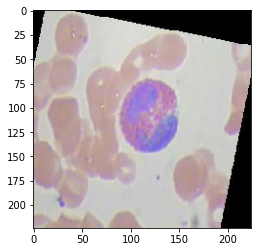

In [15]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [16]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]  #提取前8层的输出

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)  #创建一个模型，给定模型的输入，可以返回这些输出

In [49]:
activations = activation_model.predict(img_tensor)    # 返回8个Numpy数组组成的列表，每个层激活对应一个Numpy数组

first_layer_activation = activations[4]
print(first_layer_activation.shape)

(1, 52, 52, 128)


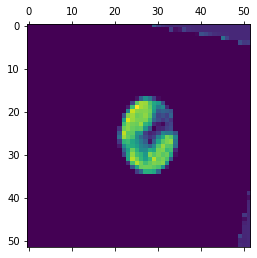

In [50]:
import keras
import matplotlib.pyplot as plt

x = plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.show(x)

MemoryError: Unable to allocate 4.60 PiB for an array with shape (467943424, 1384448) and data type float64

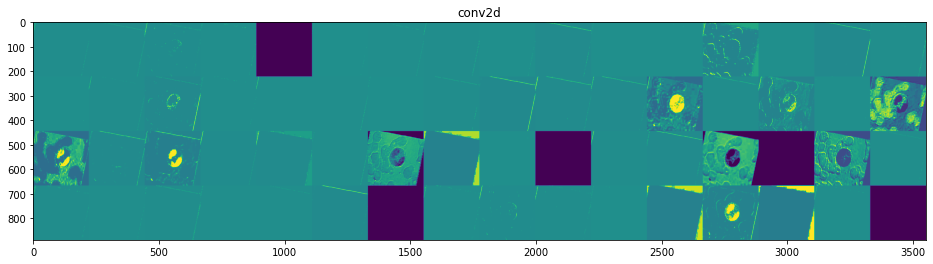

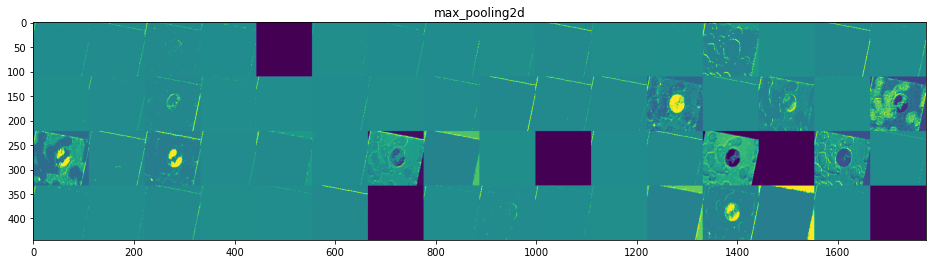

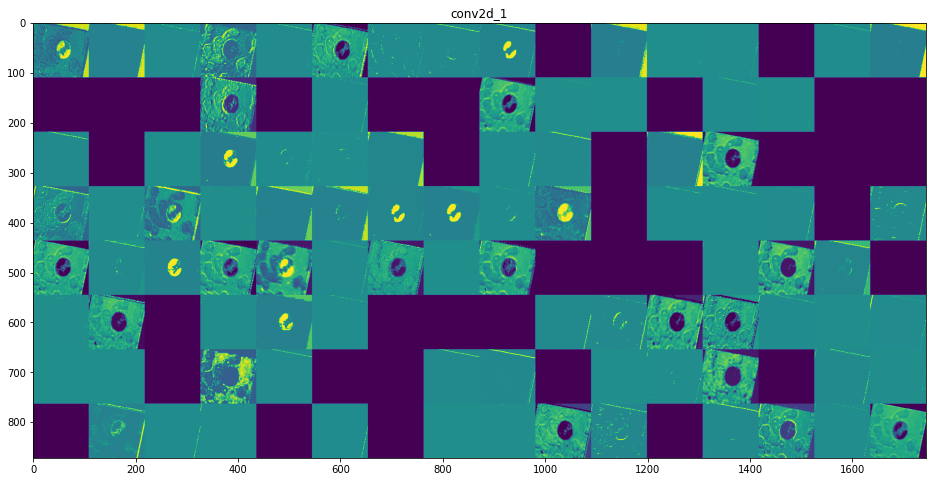

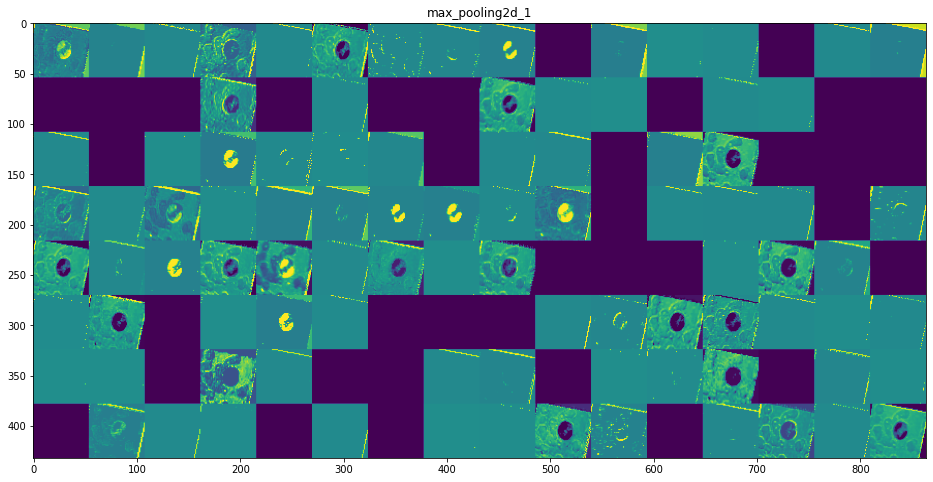

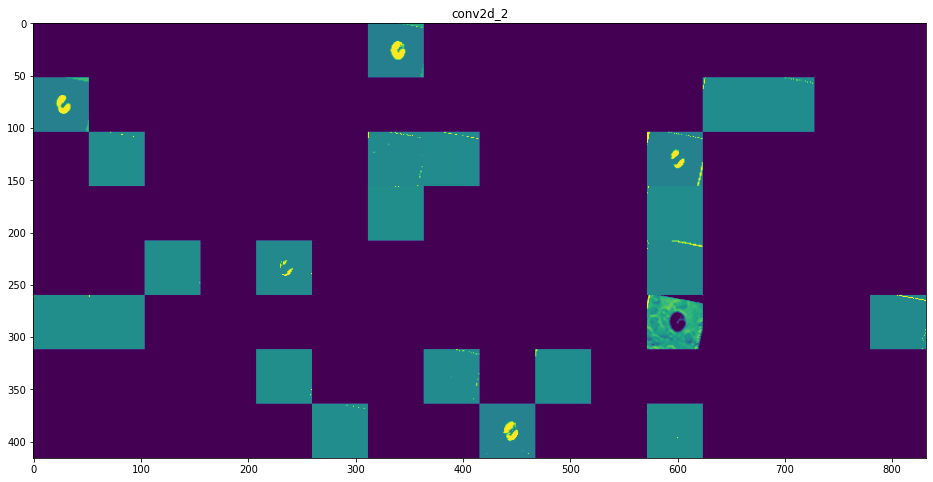

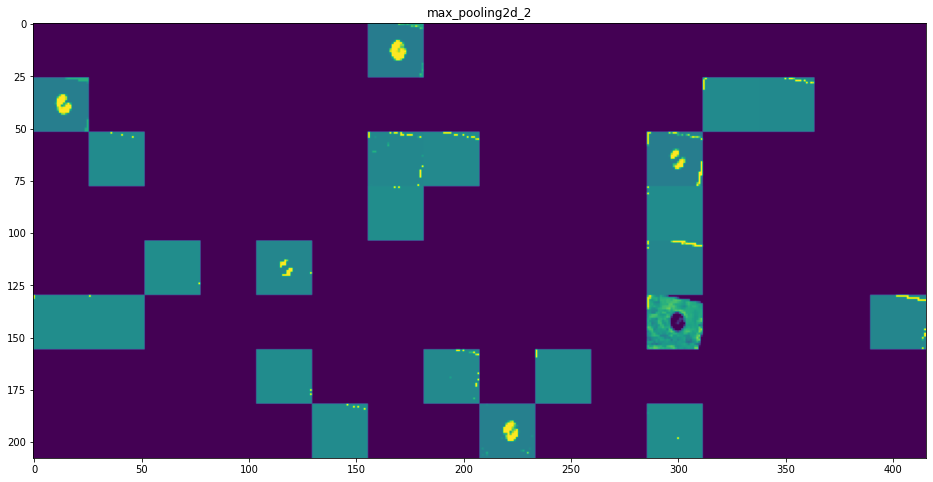

In [42]:
import keras


layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)  # 用来存储层的名称，这样你就可以把层的名称画到图中

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):    # 显示特征图
    n_features = layer_activation.shape[-1]        # 特征图中的特征个数

    size = layer_activation.shape[1]   # 特征图的形状为（1， size， size， n_features）

    n_cols = n_features // images_per_row  # 在这个矩阵中将激活通道平铺
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):   #将每个过滤器平铺到一个大的水平网格中
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]

               #对特征进行后处理，使其看起来更加美观
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image   # 显示网格


    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()